<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 

#### <ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [1]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Add necessary imports and functions to read the data
df = pd.read_csv('yellow_tripdata_small_2016-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Remove data outside the bounding box</h2>


In [3]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
pickup_long = df['pickup_longitude']
pickup_lat = df['pickup_latitude']
drop_long = df['dropoff_longitude']
drop_lat = df['dropoff_latitude']
df = df[(westlimit<=pickup_long) & (pickup_long<=eastlimit) & (southlimit<=pickup_lat) & (pickup_lat<=northlimit) & (westlimit<=drop_long) & (drop_long<=eastlimit) & (southlimit<=drop_lat) & (drop_lat<=northlimit)]
df.shape

(1070406, 19)

<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [4]:
format_ = '%Y-%m-%d %H:%M:%S'
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, format_))
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, format_))
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.shape

(1070406, 20)

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [5]:
df['duration'] = df['duration'].apply(lambda x:x/np.timedelta64(1, 's'))
df.shape

(1070406, 20)

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [6]:
df = df[df['duration'] <= 10000]
df.shape

(1068795, 20)

<h2>Plot duration and compare with a gamma distribution</h2>

<AxesSubplot:xlabel='duration', ylabel='Density'>

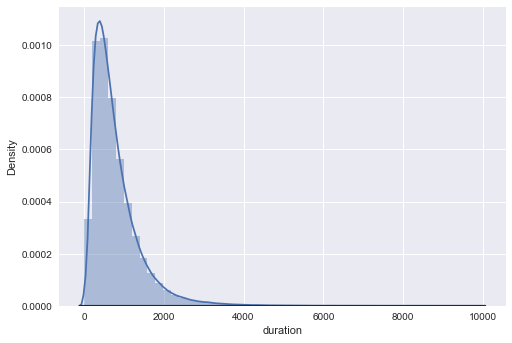

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.distplot(df['duration'], norm_hist = True, fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

<AxesSubplot:xlabel='trip_distance', ylabel='duration'>

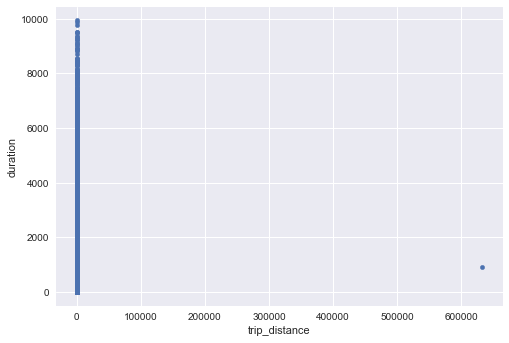

In [9]:
df.plot.scatter(x='trip_distance', y='duration')

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [10]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.isoweekday())
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.0,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30,1351.0,2


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [11]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.0,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.0,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.0,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.0,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.0,0.3,14.30,1351.0,2,11


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

<AxesSubplot:xlabel='day_of_week'>

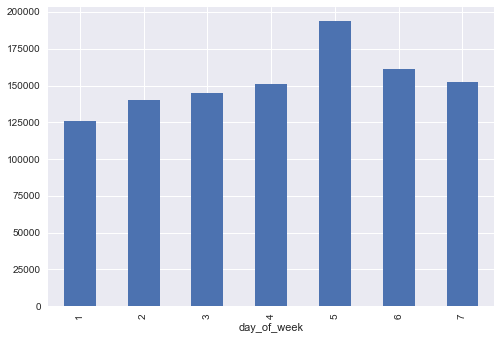

In [12]:
grouped_week = df.groupby('day_of_week')
grouped_week.size().plot(kind='bar')

<AxesSubplot:xlabel='pickup_hour'>

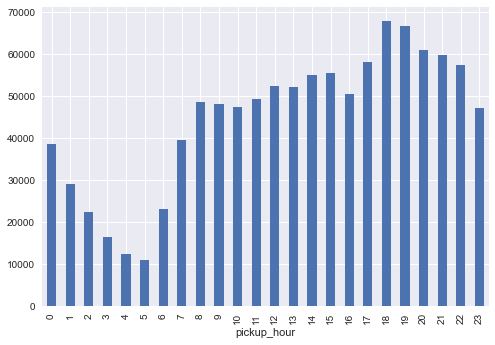

In [13]:
grouped_day = df.groupby('pickup_hour')
grouped_day.size().plot(kind='bar')

<h2>Create zones</h2>

In [14]:
def createZoneTable(zone_factor, westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    length = (eastlimit - westlimit) / zone_factor
    width = (northlimit - southlimit) / zone_factor
    num = 0
    for i in range(zone_factor):
        for j in range(zone_factor):
            coord = []
            top_left = [westlimit + j * length, southlimit + i * width]
            top_right = [westlimit + (j + 1) * length, southlimit + i * width]
            bottom_left = [westlimit + j * length, southlimit + (i + 1) * width]
            bottom_right = [westlimit + (j + 1) * length, southlimit + (i + 1) * width]
            coord.extend([top_left, top_right, bottom_right, bottom_left, top_left])
            zone_table.append((str(num), coord))
            num += 1

    return zone_table

In [15]:
zone_table = createZoneTable(2)
zone_table

[('0',
  [[-74.2635, 40.4856],
   [-74.00805, 40.4856],
   [-74.00805, 40.7226],
   [-74.2635, 40.7226],
   [-74.2635, 40.4856]]),
 ('1',
  [[-74.00805, 40.4856],
   [-73.7526, 40.4856],
   [-73.7526, 40.7226],
   [-74.00805, 40.7226],
   [-74.00805, 40.4856]]),
 ('2',
  [[-74.2635, 40.7226],
   [-74.00805, 40.7226],
   [-74.00805, 40.9596],
   [-74.2635, 40.9596],
   [-74.2635, 40.7226]]),
 ('3',
  [[-74.00805, 40.7226],
   [-73.7526, 40.7226],
   [-73.7526, 40.9596],
   [-74.00805, 40.9596],
   [-74.00805, 40.7226]])]

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [16]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    
    for i in range(len(zone_table)):
        zone_id, zone_coor = zone_table[i][0], zone_table[i][1]
        data_point = {'geometry': {'coordinates': [zone_coor], 'type': 'Polygon'},
                      'properties': {'zone_id': zone_id},
                      'type': 'Feature'
                     }
        zone_data_dict_features.append(data_point)
    
    return zone_data_dict

In [17]:
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.00805, 40.4856],
      [-74.00805, 40.7226],
      [-74.2635, 40.7226],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '0'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.00805, 40.4856],
      [-73.7526, 40.4856],
      [-73.7526, 40.7226],
      [-74.00805, 40.7226],
      [-74.00805, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '1'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.2635, 40.7226],
      [-74.00805, 40.7226],
      [-74.00805, 40.9596],
      [-74.2635, 40.9596],
      [-74.2635, 40.7226]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '2'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.00805, 40.7226],
      [-73.7526, 40.7226],
      [-73.7526, 40.9596],
      [-74.00805, 40.9596],
      [-74.00805, 40.7226]]],
    'type': 'Polygon'},
   'properties': {'zon

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [18]:
zone_factor = 20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [19]:
def get_zone(lon,lat,zone_table):
    
    for zone in zone_table:
        lat_small, lat_large = zone[1][0][1], zone[1][2][1]
        long_small, long_large = zone[1][0][0], zone[1][1][0]
        if lat_small <= lat and lat <= lat_large and long_small <= lon and lon <= long_large:
            return zone[0]

In [20]:
get_zone(-74.19,40.65, zone_table)

'122'

In [21]:
zone_table[122]

('122',
 [[-74.21240999999999, 40.6278],
  [-74.186865, 40.6278],
  [-74.186865, 40.6515],
  [-74.21240999999999, 40.6515],
  [-74.21240999999999, 40.6278]])

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [22]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [22]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'], x['pickup_latitude'], zone_table), axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'], x['dropoff_latitude'], zone_table), axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.0,0.3,11.15,657.0,1,10,231,230
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.0,0.3,8.16,365.0,3,10,252,251
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.0,0.3,12.30,502.0,2,0,209,189
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.0,0.3,6.60,194.0,7,16,251,252
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.0,0.3,14.30,1351.0,2,11,231,231


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [23]:
same_zone = df[df['pickup_zone'] == df['dropoff_zone']].shape[0]
perc_same_zone = same_zone / df.shape[0]
print(perc_same_zone)

high_pick_zone = df['pickup_zone'].value_counts().index[0]
print(high_pick_zone)

high_drop_zone = df['dropoff_zone'].value_counts().index[0]
print(high_drop_zone)

0.23668056081849184
231
231


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [24]:
grouped_df = df.groupby(['pickup_zone', 'pickup_hour']).size().unstack()
grouped_df[1]

pickup_zone
104    NaN
106    NaN
107    NaN
108    NaN
109    2.0
      ... 
93     NaN
94     NaN
97     NaN
98     NaN
99     NaN
Name: 1, Length: 207, dtype: float64

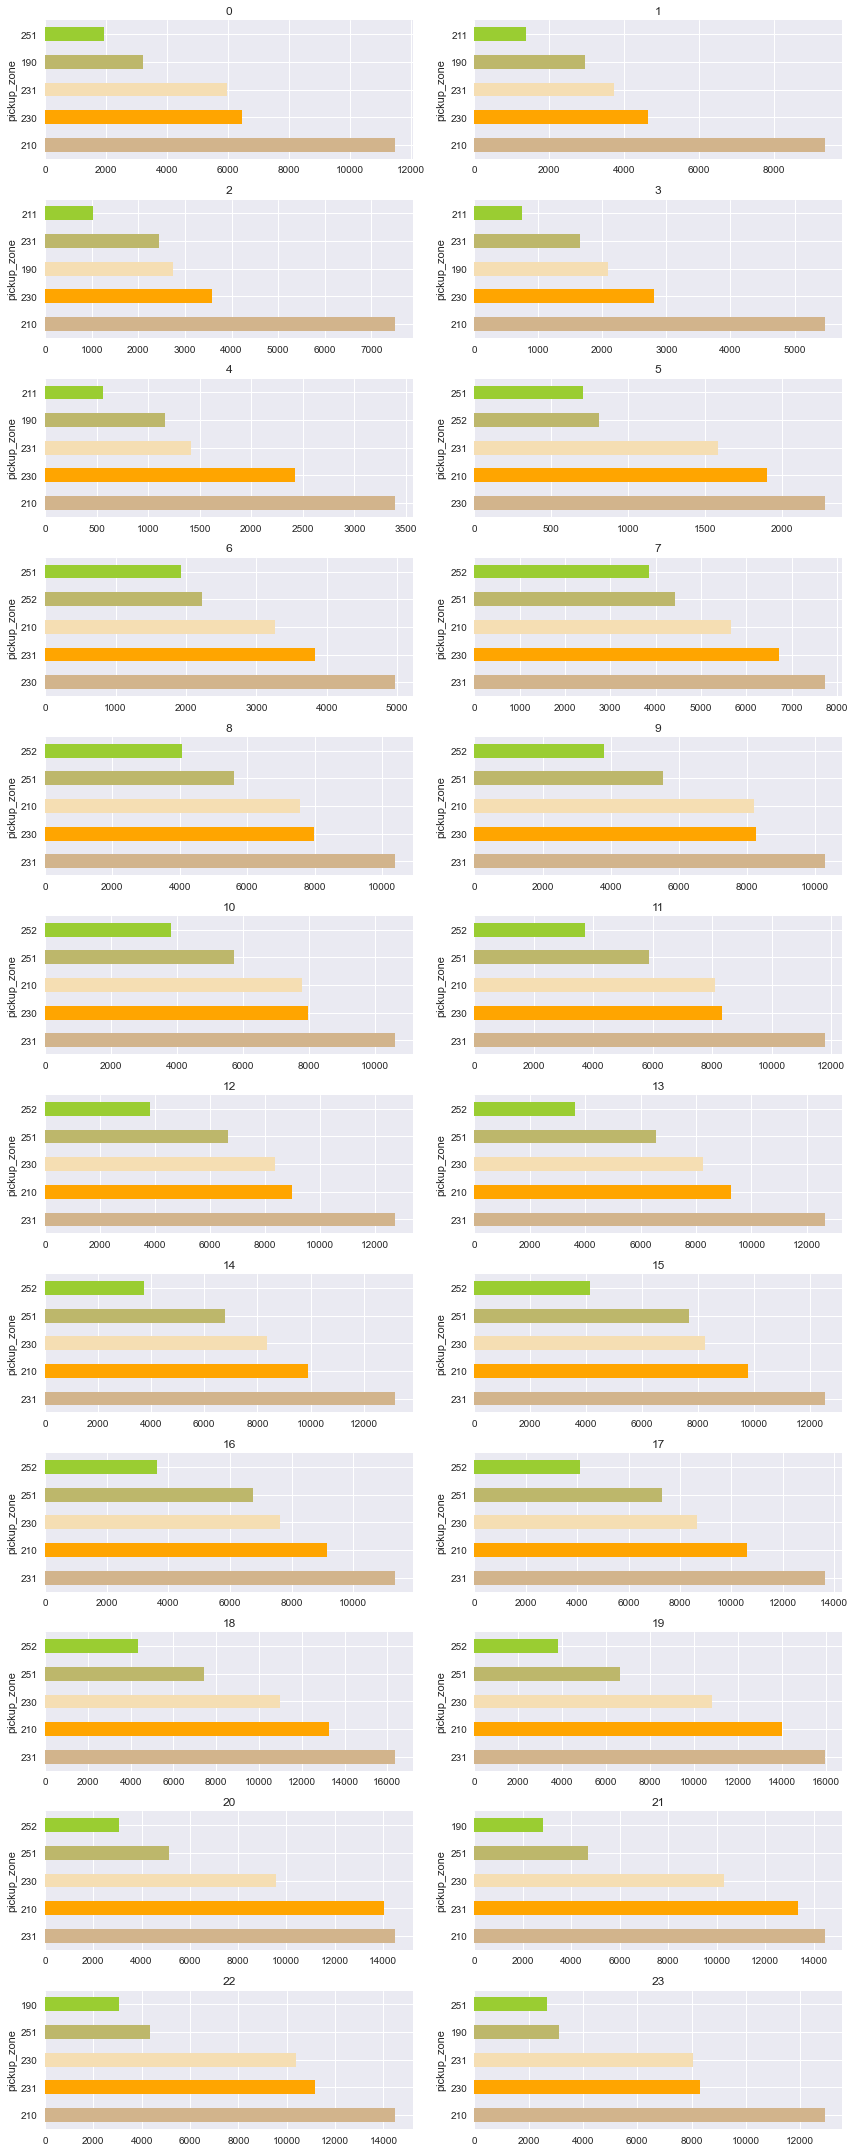

In [25]:
zone_hour = df.groupby(['pickup_zone', 'pickup_hour']).size().unstack()

%matplotlib inline
COL_NUM = 2
ROW_NUM = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM,figsize=(12,30))

colors = ['tan', 'orange', 'wheat', 'darkkhaki', 'yellowgreen']
for i, (hour, zone_count) in enumerate(zone_hour.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(hour)

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

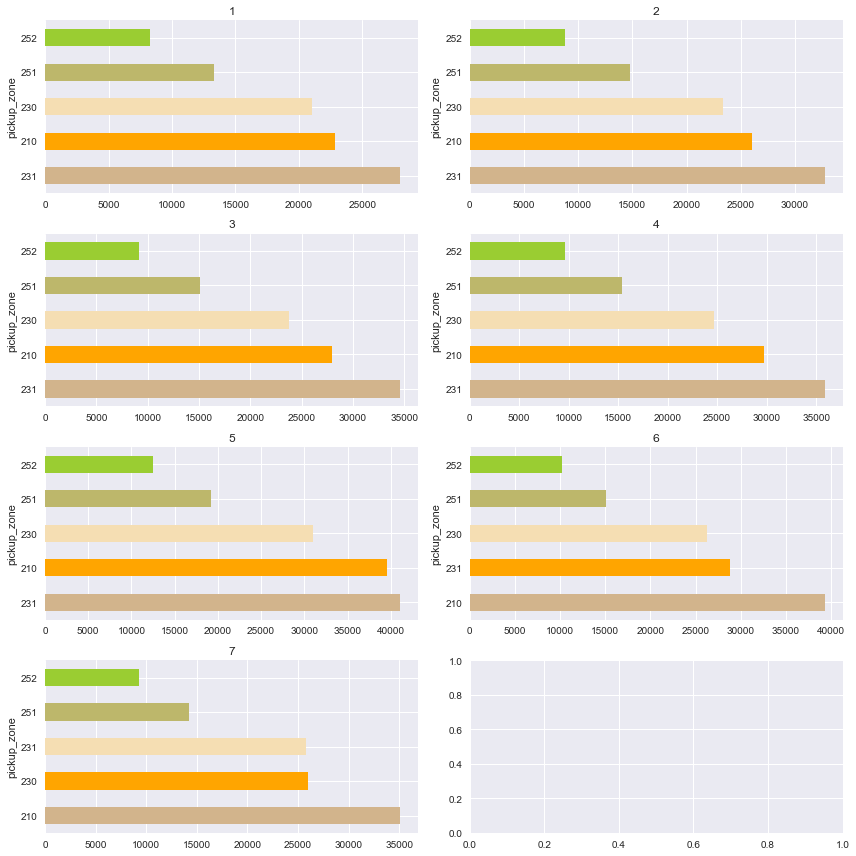

In [26]:
zone_weekday = df.groupby(['pickup_zone', 'day_of_week']).size().unstack()

%matplotlib inline
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM,figsize=(12,12))
axes
colors = ['tan', 'orange', 'wheat', 'darkkhaki', 'yellowgreen']
for i, (weekday, zone_count) in enumerate(zone_weekday.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone_count.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(weekday)

plt.tight_layout() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [27]:
df_8_9 = df[(df['pickup_hour'] == 8) & (df['day_of_week'] != 6) & (df['day_of_week'] != 7)]
df_8_9.groupby('pickup_zone').size().sort_values(ascending=False)
# The most frequent morning pickup zone is zone 231.

pickup_zone
231    9186
230    6765
210    6550
251    4862
252    3392
       ... 
179       1
163       1
155       1
134       1
92        1
Length: 86, dtype: int64

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [28]:
import folium

In [29]:
zone_group = df.groupby("pickup_zone")
sizes = pd.DataFrame(zone_group.size())
sizes.rename(columns={0:"pickup_num"},inplace=True)
sizes.reset_index(level=0, inplace=True) # from index to columns
sizes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pickup_zone  207 non-null    object
 1   pickup_num   207 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [30]:
import json
zone_json = json.dumps(createGeoJsonObject(zone_table))

In [32]:
zone_json

'{"type": "FeatureCollection", "features": [{"geometry": {"coordinates": [[[-74.2635, 40.4856], [-74.237955, 40.4856], [-74.237955, 40.509299999999996], [-74.2635, 40.509299999999996], [-74.2635, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "0"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.237955, 40.4856], [-74.21240999999999, 40.4856], [-74.21240999999999, 40.509299999999996], [-74.237955, 40.509299999999996], [-74.237955, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "1"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.21240999999999, 40.4856], [-74.186865, 40.4856], [-74.186865, 40.509299999999996], [-74.21240999999999, 40.509299999999996], [-74.21240999999999, 40.4856]]], "type": "Polygon"}, "properties": {"zone_id": "2"}, "type": "Feature"}, {"geometry": {"coordinates": [[[-74.186865, 40.4856], [-74.16131999999999, 40.4856], [-74.16131999999999, 40.509299999999996], [-74.186865, 40.509299999999996], [-74.186865, 40.4856]]], "type": "P

In [31]:
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=zone_json, data=sizes,
             columns=['pickup_zone','pickup_num'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of pick-up number')
folium.LayerControl().add_to(m)
m